In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import glob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#Importing Dataset

In [ ]:
df=pd.read_csv("C:\\Users\\RedPr\\Downloads\\Malignant Comment Project\\spam.csv",encoding="ISO-8859-1")

In [ ]:

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df=df.drop(["Unnamed: 2",	"Unnamed: 3",	"Unnamed: 4"],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
df.dtypes

v1    object
v2    object
dtype: object

#Checking Null Values

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#Pre Cleaning Visualization

SMS Type
ham     4825
spam     747
Name: v1, dtype: int64


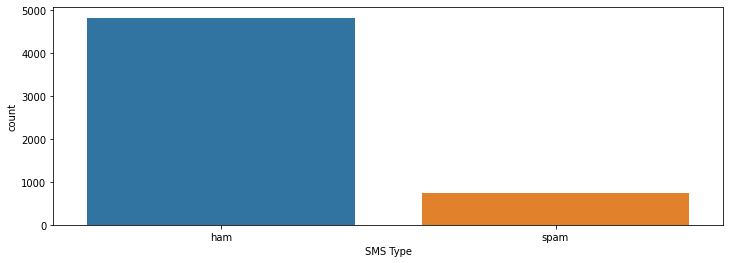

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(df["v1"])
plt.xlabel("SMS Type")
print("SMS Type")
print(df['v1'].value_counts())



In [ ]:
a=train.iloc[:,2:].sum(axis =1).value_counts()
b=a[1:].sum()


Number of non abusive and abusive comments
ham     4825
spam     747
Name: v1, dtype: int64


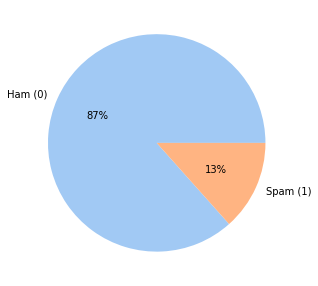

In [ ]:
plt.figure(figsize=(12,5))
m=pd.DataFrame(df['v1'].value_counts())
palette_color = sns.color_palette('pastel')
l=["Ham (0)",f"Spam (1)"]
plt.pie(m,labels=l,colors=palette_color, autopct='%.0f%%')
print("Number of non abusive and abusive comments")
print(df['v1'].value_counts())
plt.show()

# Encoding Target Variable

In [ ]:
dff=df.copy()
dff.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
val={"v1":{"ham":0,"spam":1}}
dff=dff.replace(val)

In [ ]:
dff.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#Data Cleaning

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_http(text):
    return re.sub(r'http\S+', '', text)

In [ ]:
dff['v2']=dff['v2'].apply(strip_html)

In [ ]:
dff['v2']=dff['v2'].apply(remove_http)
dff["v2"] = dff["v2"].apply(lambda x: " ".join(x for x in x.split() if '.com' not in x))
dff["v2"] = dff["v2"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
dff["v2"] = dff["v2"].str.replace('\d','')
dff["v2"] = dff["v2"].str.replace('[^\w\s]','')

In [ ]:
from nltk.corpus import stopwords
import re,string
s = set(stopwords.words("english"))
p = list(string.punctuation)
s.update(p)

dff["v2"] = dff["v2"].apply(lambda x: " ".join(x for x in x.split() if x not in s))

In [ ]:
from textblob import Word
dff["v2"] = dff["v2"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
dff["v2"] = dff["v2"].apply(lambda x: ' '.join( [x for x in x.split() if len(x)>1] ))

In [ ]:
dff.head()

,v1,v2
0,0,go jurong point crazy available bugis great wo...
1,0,ok lar joking wif oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,dun say early hor already say
4,0,nah dont think go usf life around though


In [ ]:
z=[]
for i in range(dff.shape[0]):
    if (not(dff.iloc[i,1] and dff.iloc[i,1].strip())):
      z.append(i)    

In [ ]:
z

[959, 1552, 1611, 2805, 3374, 4573, 4822, 4854, 5173]

- Rows with empty string

In [ ]:
x=z.copy()
x.reverse()
print(x)

[5173, 4854, 4822, 4573, 3374, 2805, 1611, 1552, 959]


In [ ]:
dff.iloc[958:961,:]

,v1,v2
958,0,sort code acc bank natwest reply confirm ive s...
959,0,
960,0,sure cant take sick time


In [ ]:
dff.shape

(5572, 2)

- Before dropping rows with empty string.

In [ ]:
for i in x:
  dff=dff.drop(i)

In [ ]:
dff.iloc[958:961,:]

,v1,v2
958,0,sort code acc bank natwest reply confirm ive s...
960,0,sure cant take sick time
961,1,urgent trying contact today draw show prize gu...


In [ ]:
df.shape

(5572, 2)

- After dropping rows with empty string.


# Post Cleaning Visualization

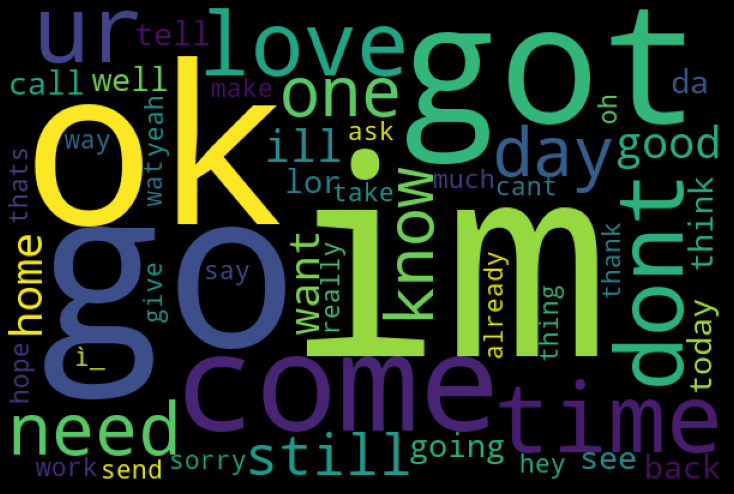

In [ ]:
from wordcloud import WordCloud
hams = dff['v2'][dff["v1"]==0]
word_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**- Ham Word Cloud**

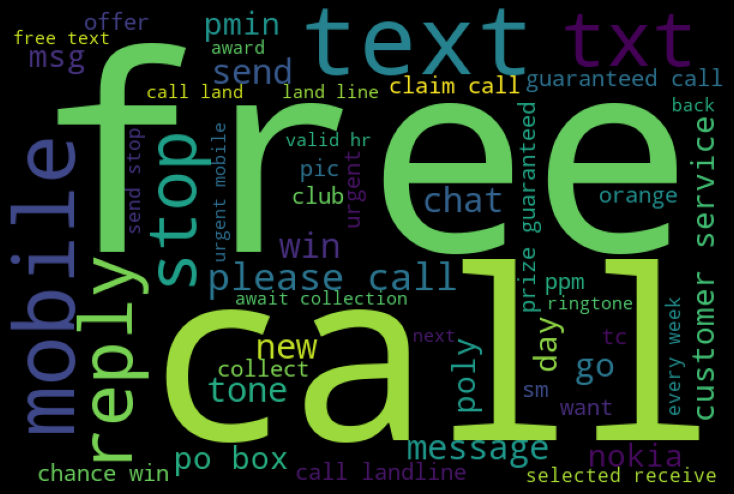

In [ ]:
from wordcloud import WordCloud
hams = dff['v2'][dff["v1"]==1]
word_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**- Spam Word Cloud**

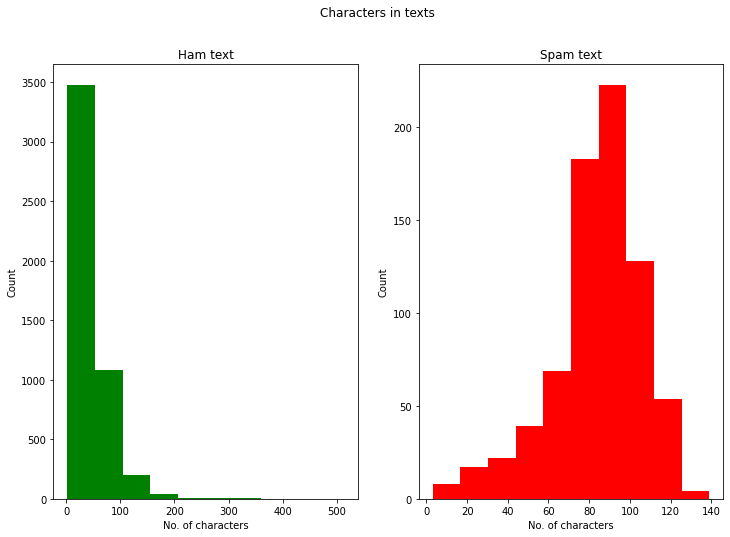

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=dff[dff['v1']==0]['v2'].str.len()
ax1.set_ylabel("Count")
ax1.set_xlabel("No. of characters")
ax1.hist(text_len,color='green')
ax1.set_title('Ham text')
text_len=dff[dff['v1']==1]['v2'].str.len()
ax2.set_xlabel("No. of characters")
ax2.set_ylabel("Count")
ax2.hist(text_len,color='red')
ax2.set_title('Spam text')
fig.suptitle('Characters in texts')
plt.show()

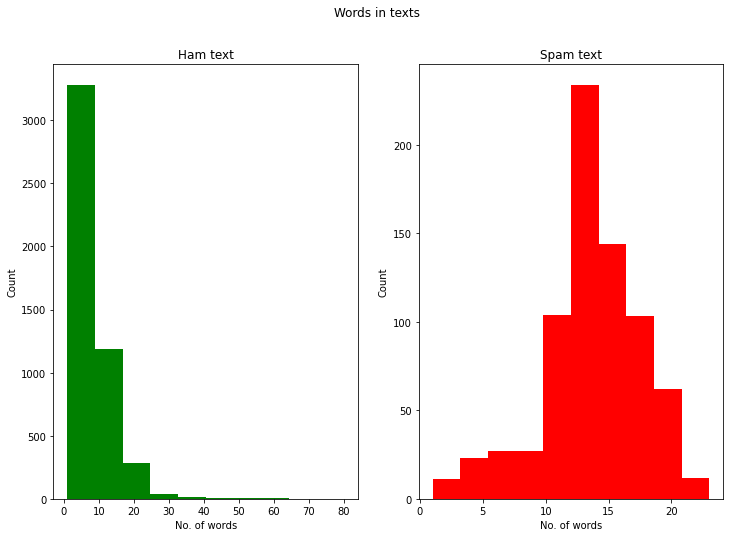

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=dff[dff['v1']==0]['v2'].str.split().map(lambda x: len(x))
ax1.set_ylabel("Count")
ax1.set_xlabel("No. of words")
ax1.hist(text_len,color='green')
ax1.set_title('Ham text')
text_len=dff[dff['v1']==1]['v2'].str.split().map(lambda x: len(x))
ax2.set_ylabel("Count")
ax2.set_xlabel("No. of words")
ax2.hist(text_len,color='red')
ax2.set_title('Spam text')
fig.suptitle('Words in texts')
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

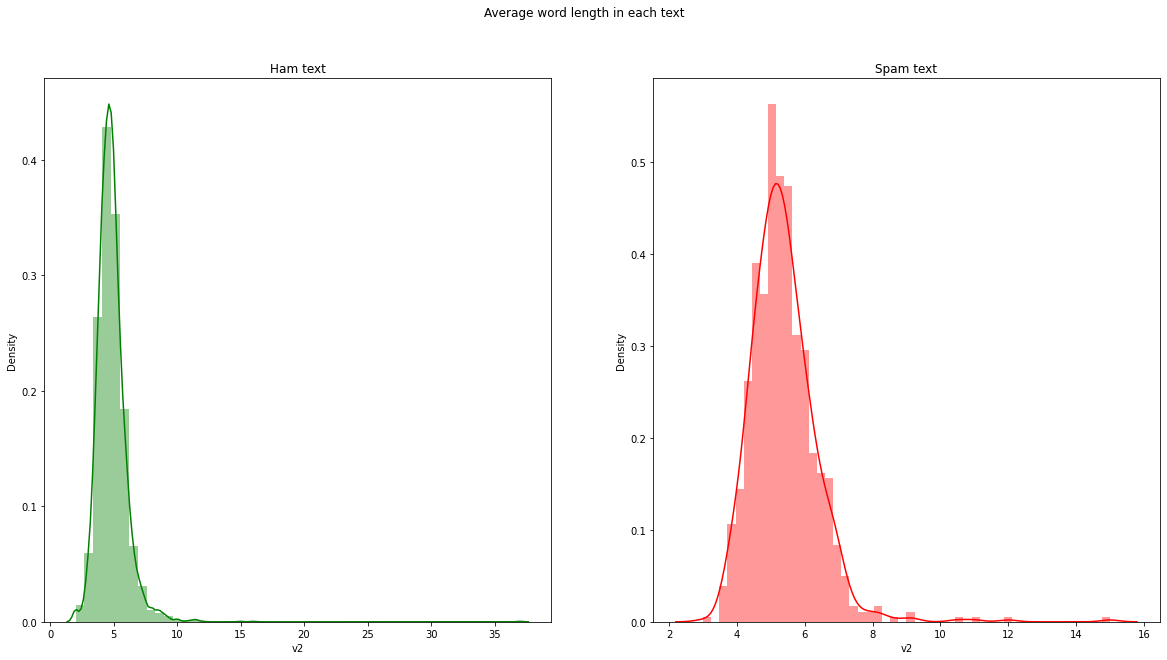

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=dff[dff['v1']==0]['v2'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Ham text')
word=dff[dff['v1']==1]['v2'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Spam text')
fig.suptitle('Average word length in each text')

In [ ]:
from collections import Counter
corpus = []
for i in dff.v2:
    for j in i.split():
        corpus.append(j.strip())

counter = Counter(corpus)
common_words = counter.most_common(10)
dict(common_words)

{'call': 602,
 'im': 464,
 'get': 401,
 'ur': 384,
 'go': 308,
 'dont': 279,
 'free': 278,
 'ok': 277,
 'know': 267,
 'day': 255}

In [ ]:
unigram=(pd.Series(nltk.ngrams(corpus, 1)).value_counts())
unigram

(call,)          602
(im,)            464
(get,)           401
(ur,)            384
(go,)            308
                ... 
(curtsey,)         1
(practising,)      1
(rupaul,)          1
(basket,)          1
(bitching,)        1
Length: 7871, dtype: int64

In [ ]:
bigram=(pd.Series(nltk.ngrams(corpus, 2)).value_counts())
bigram

(please, call)    55
(call, later)     52
(ill, call)       48
(let, know)       42
(sorry, ill)      39
                  ..
(know, meant)      1
(usb, oh)          1
(play, usb)        1
(think, play)      1
(true, name)       1
Length: 35202, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    print(vec.vocabulary_)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

{'go': 2648, 'jurong': 3480, 'point': 5069, 'crazy': 1450, 'available': 458, 'bugis': 879, 'great': 2738, 'world': 7609, 'la': 3624, 'buffet': 877, 'cine': 1187, 'got': 2701, 'amore': 231, 'wat': 7387, 'ok': 4660, 'lar': 3657, 'joking': 3450, 'wif': 7512, 'oni': 4690, 'free': 2455, 'entry': 2067, 'wkly': 7565, 'comp': 1294, 'win': 7524, 'fa': 2197, 'cup': 1504, 'final': 2309, 'tkts': 6862, 'st': 6321, 'may': 4055, 'text': 6711, 'receive': 5447, 'questionstd': 5343, 'txt': 7058, 'ratetcs': 5395, 'apply': 317, 'over': 4781, 'dun': 1928, 'say': 5769, 'early': 1947, 'hor': 3051, 'already': 204, 'nah': 4373, 'dont': 1845, 'think': 6781, 'usf': 7200, 'life': 3746, 'around': 365, 'though': 6801, 'freemsg': 2463, 'hey': 2952, 'darling': 1564, 'week': 7433, 'word': 7597, 'back': 501, 'id': 3147, 'like': 3761, 'fun': 2521, 'still': 6385, 'tb': 6645, 'xxx': 7715, 'std': 6361, 'chgs': 1135, 'send': 5854, 'rcv': 5406, 'even': 2113, 'brother': 848, 'speak': 6240, 'treat': 6990, 'aid': 151, 'patent':

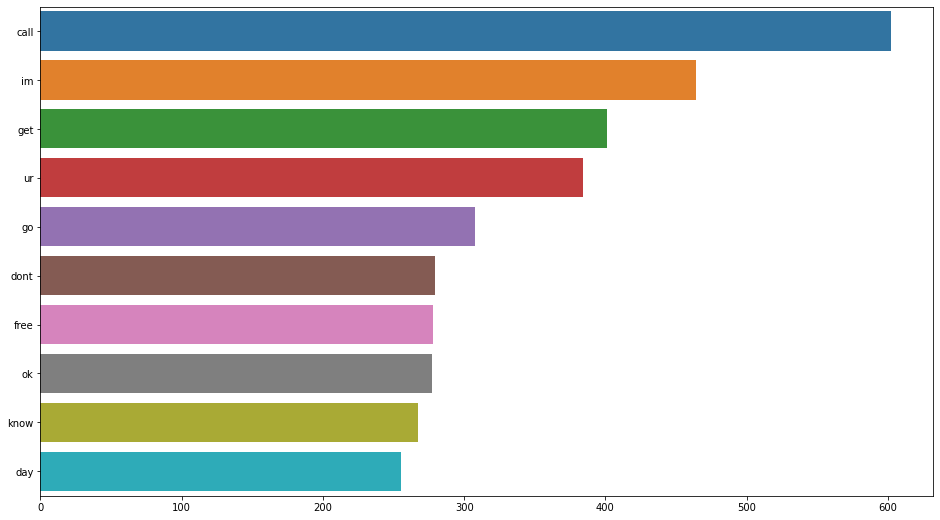

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(dff.v2,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

{'go jurong': 9417, 'jurong point': 12852, 'point crazy': 19505, 'crazy available': 4872, 'available bugis': 1385, 'bugis great': 2725, 'great world': 10200, 'world la': 29014, 'la buffet': 13381, 'buffet cine': 2721, 'cine got': 3903, 'got amore': 9906, 'amore wat': 733, 'ok lar': 17962, 'lar joking': 13462, 'joking wif': 12808, 'wif oni': 28518, 'free entry': 8284, 'entry wkly': 7003, 'wkly comp': 28748, 'comp win': 4432, 'win fa': 28564, 'fa cup': 7409, 'cup final': 4977, 'final tkts': 7771, 'tkts st': 25809, 'st may': 23457, 'may text': 15434, 'text fa': 24794, 'fa receive': 7410, 'receive entry': 20495, 'entry questionstd': 6999, 'questionstd txt': 20114, 'txt ratetcs': 26612, 'ratetcs apply': 20246, 'apply over': 985, 'dun say': 6558, 'say early': 21423, 'early hor': 6622, 'hor already': 11543, 'already say': 558, 'nah dont': 16826, 'dont think': 6273, 'think go': 25290, 'go usf': 9503, 'usf life': 27168, 'life around': 13937, 'around though': 1123, 'freemsg hey': 8387, 'hey darl

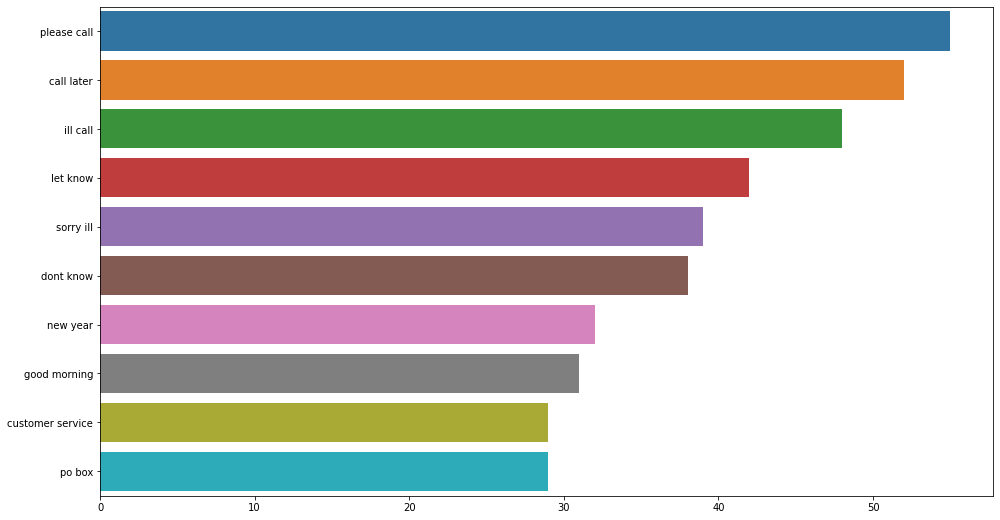

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(dff.v2,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

{'go jurong point': 9231, 'jurong point crazy': 12947, 'point crazy available': 19528, 'crazy available bugis': 4691, 'available bugis great': 1285, 'bugis great world': 2537, 'great world la': 10123, 'world la buffet': 28813, 'la buffet cine': 13461, 'buffet cine got': 2533, 'cine got amore': 3729, 'got amore wat': 9797, 'ok lar joking': 17995, 'lar joking wif': 13537, 'joking wif oni': 12903, 'free entry wkly': 8043, 'entry wkly comp': 6838, 'wkly comp win': 28569, 'comp win fa': 4277, 'win fa cup': 28379, 'fa cup final': 7218, 'cup final tkts': 4782, 'final tkts st': 7555, 'tkts st may': 25594, 'st may text': 23299, 'may text fa': 15505, 'text fa receive': 24562, 'fa receive entry': 7219, 'receive entry questionstd': 20469, 'entry questionstd txt': 6832, 'questionstd txt ratetcs': 20092, 'txt ratetcs apply': 26369, 'ratetcs apply over': 20213, 'dun say early': 6400, 'say early hor': 21329, 'early hor already': 6480, 'hor already say': 11491, 'nah dont think': 16810, 'dont think go':

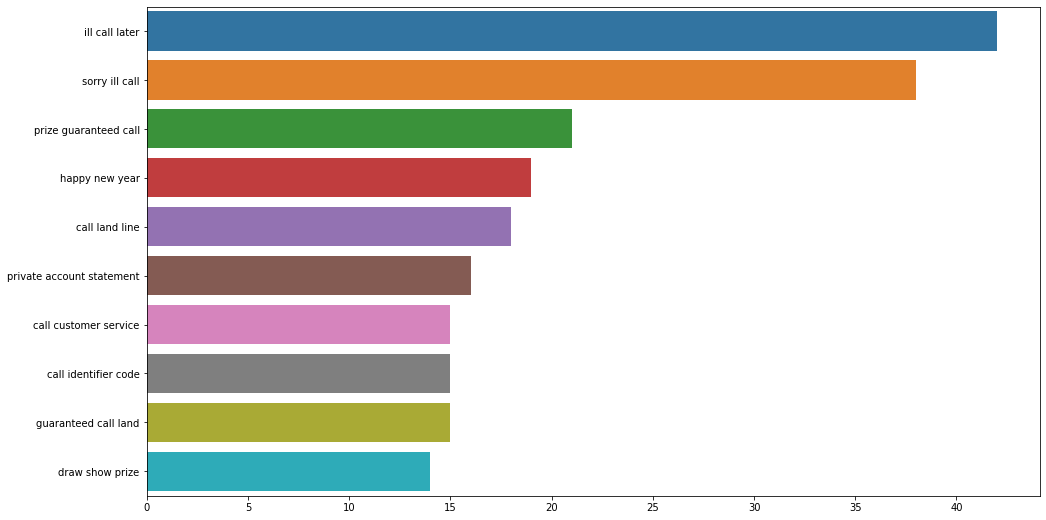

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(dff.v2,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

#Separating Input and target features

In [ ]:
x=dff["v2"]
x.head()

0    go jurong point crazy available bugis great wo...
1                                ok lar joking wif oni
2    free entry wkly comp win fa cup final tkts st ...
3                        dun say early hor already say
4             nah dont think go usf life around though
Name: v2, dtype: object

In [ ]:
y=dff["v1"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int64

#Vectorize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vect = CountVectorizer()
vect.fit_transform(x)

freq_term_matrix = vect.transform(x)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

# Training Dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,classification_report,auc,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score
lg = LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(tf_idf_matrix,y,test_size=0.2,random_state=95)

In [ ]:
lg.fit(x_train,y_train) 
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)
print("Train Accuracy : ",round(accuracy_score(y_train,pred_train)*100,2))
print("Test Accuracy : ",round(accuracy_score(y_test,pred_test)*100,2))
cv_score=cross_val_score(lg,tf_idf_matrix,y,cv=5)
print("cv score : ", round(cv_score.mean()*100,2))

Train Accuracy :  96.4
Test Accuracy :  94.88
cv score :  95.56


In [ ]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, lg.predict_proba(x_test))
logloss


0.15918479349273867

In [ ]:
print("Classification Report:\n",classification_report(y_test,pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       942
           1       0.96      0.70      0.81       171

    accuracy                           0.95      1113
   macro avg       0.95      0.85      0.89      1113
weighted avg       0.95      0.95      0.95      1113



In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix\n",confusion_matrix(y_test,pred_test))

Confusion Matrix
 [[937   5]
 [ 52 119]]


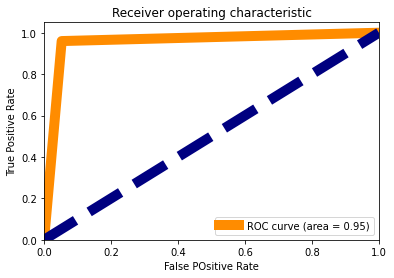

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()
    

#Model Selection

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    cv_score=cross_val_score(algorithm_instance,tf_idf_matrix,y,cv=5)
    print("cv score : ", round(cv_score.mean()*100,2))
    logloss = log_loss(y_test, algorithm_instance.predict_proba(x_test))
    print("Log loss: ",logloss)
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   
    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()


#KNeighbors Classifier

Accuracy of training model : 97.75
Accuracy of test data : 95.69
cv score :  96.46
Log loss:  0.6705238307594215

Classification report for test data
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       942
           1       0.98      0.73      0.84       171

    accuracy                           0.96      1113
   macro avg       0.97      0.86      0.91      1113
weighted avg       0.96      0.96      0.95      1113

Classification report for training data
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3874
           1       0.99      0.83      0.91       576

    accuracy                           0.98      4450
   macro avg       0.98      0.92      0.95      4450
weighted avg       0.98      0.98      0.98      4450

Confusion Matrix
 [[940   2]
 [ 46 125]]




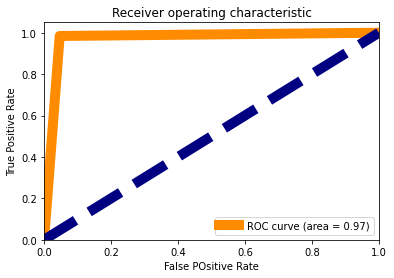

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# SVC Model

Accuracy of training model : 99.64
Accuracy of test data : 97.39
cv score :  97.03
Log loss:  0.0800859840132961

Classification report for test data
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       942
           1       0.99      0.84      0.91       171

    accuracy                           0.97      1113
   macro avg       0.98      0.92      0.95      1113
weighted avg       0.97      0.97      0.97      1113

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3874
           1       1.00      0.97      0.99       576

    accuracy                           1.00      4450
   macro avg       1.00      0.99      0.99      4450
weighted avg       1.00      1.00      1.00      4450

Confusion Matrix
 [[941   1]
 [ 28 143]]




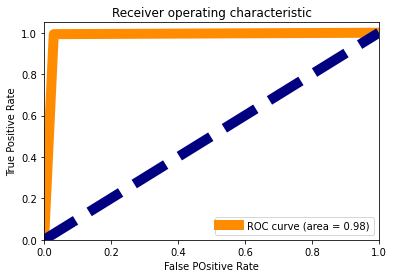

In [ ]:
from sklearn import svm
s=svm.SVC(probability=True)
model_selection(s,x_train,y_train,x_test,y_test)

# DecisionTressClassifier Model

Accuracy of training model : 100.0
Accuracy of test data : 95.78
cv score :  95.63
Log loss:  1.4585107731902993

Classification report for test data
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       942
           1       0.88      0.84      0.86       171

    accuracy                           0.96      1113
   macro avg       0.92      0.91      0.92      1113
weighted avg       0.96      0.96      0.96      1113

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3874
           1       1.00      1.00      1.00       576

    accuracy                           1.00      4450
   macro avg       1.00      1.00      1.00      4450
weighted avg       1.00      1.00      1.00      4450

Confusion Matrix
 [[922  20]
 [ 27 144]]




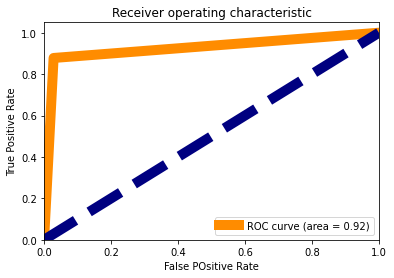

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

#Multinominal Naive Bayes

Accuracy of training model : 97.19
Accuracy of test data : 95.42
cv score :  96.37
Log loss:  0.13285475903615468

Classification report for test data
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       942
           1       1.00      0.70      0.82       171

    accuracy                           0.95      1113
   macro avg       0.97      0.85      0.90      1113
weighted avg       0.96      0.95      0.95      1113

Classification report for training data
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3874
           1       1.00      0.78      0.88       576

    accuracy                           0.97      4450
   macro avg       0.98      0.89      0.93      4450
weighted avg       0.97      0.97      0.97      4450

Confusion Matrix
 [[942   0]
 [ 51 120]]




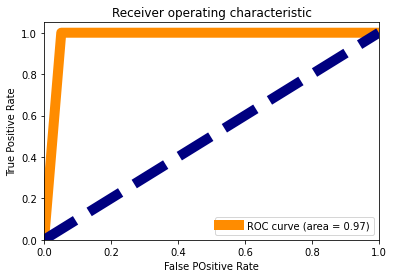

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
model_selection(mnb,x_train,y_train,x_test,y_test)

#Ensemble Method

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'n_estimators':range(0,100,50)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}


Accuracy of training model : 99.98
Accuracy of test data : 97.12
cv score :  97.16
Log loss:  0.20784666155597775

Classification report for test data
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       942
           1       1.00      0.81      0.90       171

    accuracy                           0.97      1113
   macro avg       0.98      0.91      0.94      1113
weighted avg       0.97      0.97      0.97      1113

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3874
           1       1.00      1.00      1.00       576

    accuracy                           1.00      4450
   macro avg       1.00      1.00      1.00      4450
weighted avg       1.00      1.00      1.00      4450

Confusion Matrix
 [[942   0]
 [ 32 139]]




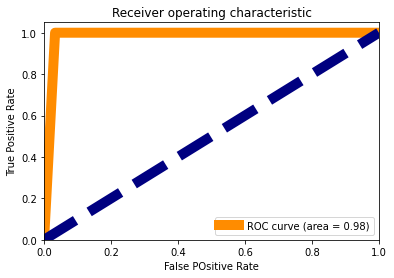

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, class_weight= 'balanced',criterion='gini', max_features= 'sqrt')
model_selection(rf,x_train,y_train,x_test,y_test)

# GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,50)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'squared_error', 'loss': 'deviance', 'max_features': 'auto', 'n_estimators': 50}


Accuracy of training model : 96.38
Accuracy of test data : 95.69
cv score :  94.88
Log loss:  0.1517099031830402

Classification report for test data
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       942
           1       1.00      0.72      0.84       171

    accuracy                           0.96      1113
   macro avg       0.98      0.86      0.91      1113
weighted avg       0.96      0.96      0.95      1113

Classification report for training data
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3874
           1       0.99      0.73      0.84       576

    accuracy                           0.96      4450
   macro avg       0.97      0.86      0.91      4450
weighted avg       0.96      0.96      0.96      4450

Confusion Matrix
 [[942   0]
 [ 48 123]]




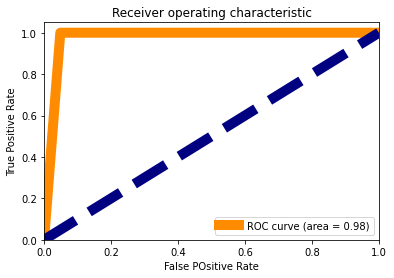

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rf3=GradientBoostingClassifier(criterion='squared_error', loss='deviance', max_features= 'auto', n_estimators= 50)
model_selection(rf3,x_train,y_train,x_test,y_test)

# Model Saving

In [ ]:
import pickle
filename='rfz.pk1'
pickle.dump(s,open(filename,'wb'))

We selected Support Vector Classifier model since
- it has minimum log loss of 0.08 and best cross validation score among all the model.
- it has highest auc score of 0.98

# Loading Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Accuracy: ",result*100)

Model Accuracy:  97.39442946990117


#Conclusion

-	In this study we found that Support Vector classifier performs slightly better than logistic regression and rest of the algorithm tested.